<a href="https://colab.research.google.com/github/brhie/Iris-Dataset-using-K-nn/blob/main/Ztm_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ML basic project!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.version

'3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]'

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() # import the data

In [ ]:
X = iris.data # these are the inputs
y = iris.target # these are the answers, target

feature_names = iris.feature_names
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split the data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # create a model
knn.fit(X_train, y_train) # train a model
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# create a function that returns a dataframe of changing score based on test data size or number of neighbors
def score_function(x):
  if x == "test size":
    size_and_score = []
    for i in range(1, 99):
      test_size = float(i)*0.01
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
      knn = KNeighborsClassifier(n_neighbors=3)
      knn.fit(X_train, y_train) # create a model
      y_pred = knn.predict(X_test)
      score = metrics.accuracy_score(y_test, y_pred)
      size_and_score.append([test_size, score])
      df = pd.DataFrame(size_and_score, columns=['test_size', 'score'])
    return df

  elif x == "number of neighbors":
    number_and_score = []
    for i in range(1, 10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      score = metrics.accuracy_score(y_test, y_pred)
      number_and_score.append([i, score])
      df = pd.DataFrame(number_and_score, columns=['number of neighbors', 'score'])
    return df

  else:
    print("Invalid Input. Input either 'test size' or 'number of neighbors'")
    return None

In [ ]:
df1 = score_function("test size")
df2 = score_function("number of neighbors")

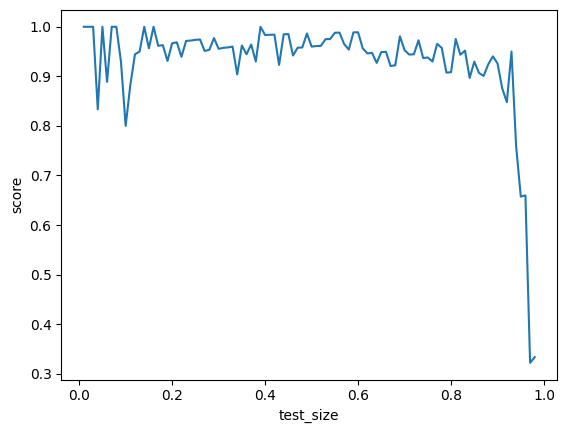

In [ ]:
# plot score based on test size
plt.plot(df1['test_size'], df1['score'])
plt.xlabel('test_size')
plt.ylabel('score')
plt.show()

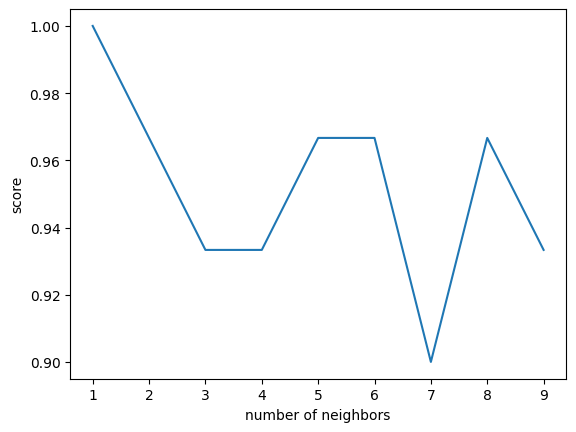

In [ ]:
# plot score based on number of neighbors
plt.plot(df2['number of neighbors'], df2['score'])
plt.xlabel('number of neighbors')
plt.ylabel('score')
plt.show()

In [ ]:
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']


In [ ]:
import joblib
joblib.dump(knn, 'mlbrain.joblib')

['mlbrain.joblib']

In [ ]:
model = joblib.load('mlbrain.joblib')
model.predict(X_test)
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]
predictions = model.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']
